In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv('ProjectDS.csv')

In [3]:
data.head()

,NDVI,dNDVI,dNBR,RESULT
0,0.223383,-0.040262,-0.094064,YES
1,0.357803,-0.054888,-0.148439,YES
2,0.275674,-0.006674,0.046614,YES
3,0.255108,-0.028314,-0.045043,YES
4,0.258632,0.061891,0.038711,YES


In [6]:
#analysis of SCL and not SCL
data[:710].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NDVI,710.0,0.304625,0.057107,0.079599,0.269410,0.312578,0.345143,0.448269
dNDVI,710.0,0.091199,0.095354,-0.328951,0.043540,0.100500,0.156221,0.389909
dNBR,710.0,0.089975,0.082862,-0.235592,0.049972,0.095608,0.142845,0.315118


In [7]:
data[710:].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NDVI,1000.0,0.226795,0.068495,-0.023309,0.177081,0.227602,0.279667,0.438087
dNDVI,1000.0,0.018794,0.085359,-0.258353,-0.038002,0.021409,0.075139,0.302345
dNBR,1000.0,0.049338,0.104471,-0.278433,-0.010399,0.054481,0.122175,0.308262


In [3]:
#prepare data for traning
import copy
rf_data=copy.copy(data)

In [4]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
rf_data['RESULT']= label_encoder.fit_transform(rf_data['RESULT']) 
print(rf_data.head())

       NDVI     dNDVI      dNBR  RESULT
0  0.223383 -0.040262 -0.094064       1
1  0.357803 -0.054888 -0.148439       1
2  0.275674 -0.006674  0.046614       1
3  0.255108 -0.028314 -0.045043       1
4  0.258632  0.061891  0.038711       1


In [5]:
labels = np.array(rf_data['RESULT'])# Remove the labels from the features
# axis 1 refers to the columns
rf_data= rf_data.drop('RESULT', axis = 1)# Saving feature names for later use
feature_list = list(rf_data.columns)# Convert to numpy array
rf_data = np.array(rf_data)

In [9]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(
        rf_data, labels, test_size = 0.3, random_state = 42, shuffle=True)

In [7]:
from sklearn.ensemble import RandomForestClassifier# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(max_depth=2, random_state=0)# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [8]:
#calculate accuracy
from sklearn.metrics import accuracy_score
predictions = rf.predict(test_features)
accuracy_score(test_labels, predictions)

0.7797270955165692

In [9]:
# Support vector machine
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(train_features)
X_test = sc_X.transform(test_features)
from sklearn import svm
from sklearn.svm import SVC
svm1 = svm.SVC(kernel='linear', C = 0.01)
svm1.fit(X_train,train_labels)
SVC(C=0.01, kernel='linear')
y_test_pred = svm1.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_test_pred)

0.847953216374269

In [11]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(train_features,train_labels)

In [12]:
lr_predict=clf.predict(test_features)
accuracy_score(test_labels,lr_predict)

0.8440545808966862

In [24]:
# Mult layer perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
mlp = MLPClassifier(hidden_layer_sizes=100, activation='relu', 
                    random_state=1, max_iter=300).fit(train_features,train_labels)
mlp_pred=mlp.predict(test_features)
accuracy_score(test_labels, mlp_pred)

0.8557504873294347

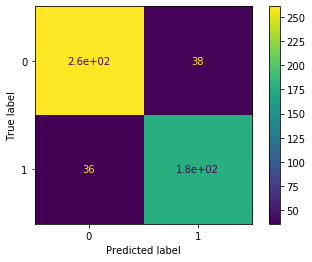

[[261  38]
 [ 36 178]]


In [14]:
# confusion matrix of mlp
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
m=confusion_matrix(test_labels, mlp_pred)
plot_confusion_matrix(mlp, test_features, test_labels)
plt.show()
print(m)

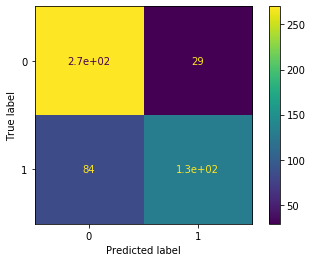

[[270  29]
 [ 84 130]]


In [20]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
#confusion matrix of random forest
m=confusion_matrix(test_labels, predictions)
plot_confusion_matrix(rf, test_features, test_labels)
plt.show()
print(m)

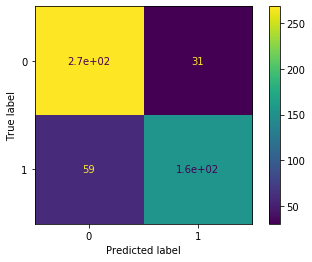

[[256  43]
 [ 35 179]]


In [19]:
#confusion matrix of SVM
m=confusion_matrix(test_labels,y_test_pred)
plot_confusion_matrix(svm1, test_features, test_labels)
plt.show()
print(m)

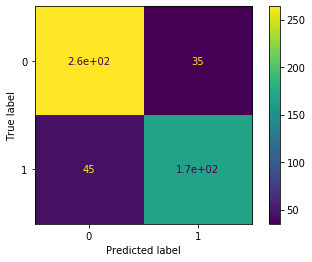

[[264  35]
 [ 45 169]]


In [18]:
#confusion matrix of Logistic regression
m=confusion_matrix(test_labels,lr_predict)
plot_confusion_matrix(clf, test_features, test_labels)
plt.show()
print(m)

In [ ]:
ip=pd.read_csv('Demo.csv')

In [8]:
demo_data=pd.read_csv('Demo.csv')

In [9]:
np_data=demo_data.to_numpy()

In [10]:
rf_pred=rf.predict(np_data)

In [12]:
c1=0
c0=0
for i in rf_pred:
    if(i==1):
        c1+=1
    else:
        c0+=1

In [13]:
c1,c0

(0, 1001)

In [14]:
rf_pred

array([0, 0, 0, ..., 0, 0, 0])